<a href="https://colab.research.google.com/github/RavinduP/Bankprediction-DT-NN/blob/main/bankdata_NN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA Parts
exploring the dataset and the patterns which are there at the dataset


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path_additional_full = "/content/drive/MyDrive/ML data set/bank-full.csv"


Mounted at /content/drive


In [ ]:

df = pd.read_csv(file_path_additional_full, sep=";", engine='python')

In [ ]:
# Shape and column names
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())


Dataset Shape: (45211, 17)

Column Names: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [ ]:

df.shape


(45211, 17)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
# Get summary statistics for numeric columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# Show unique values of each object (categorical) column
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\n{col} --> {df[col].unique()}")



job --> ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital --> ['married' 'single' 'divorced']

education --> ['tertiary' 'secondary' 'unknown' 'primary']

default --> ['no' 'yes']

housing --> ['yes' 'no']

loan --> ['no' 'yes']

contact --> ['unknown' 'cellular' 'telephone']

month --> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome --> ['unknown' 'failure' 'other' 'success']

y --> ['no' 'yes']


In [ ]:
# Check for 'unknown' values in each column
unknown_counts = (df == 'unknown').sum()
print("Columns with 'unknown' values:\n", unknown_counts[unknown_counts > 0])


Columns with 'unknown' values:
 job            288
education     1857
contact      13020
poutcome     36959
dtype: int64


In [ ]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


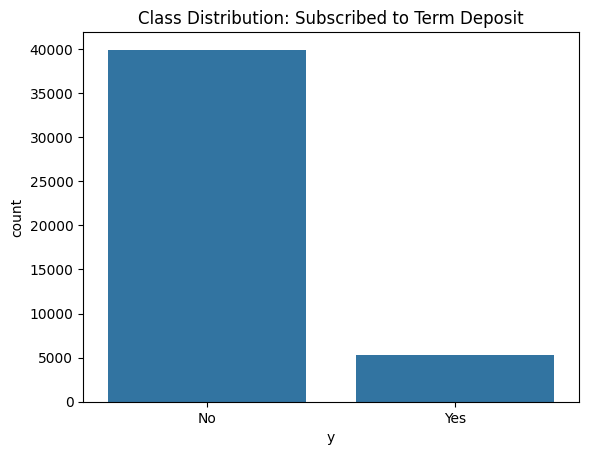

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='y', data=df)
plt.title("Class Distribution: Subscribed to Term Deposit")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# Percentage of each class
print(df['y'].value_counts(normalize=True) * 100)

In [ ]:
df['y'].groupby(df['y']).count()

,y
y,
no,39922
yes,5289


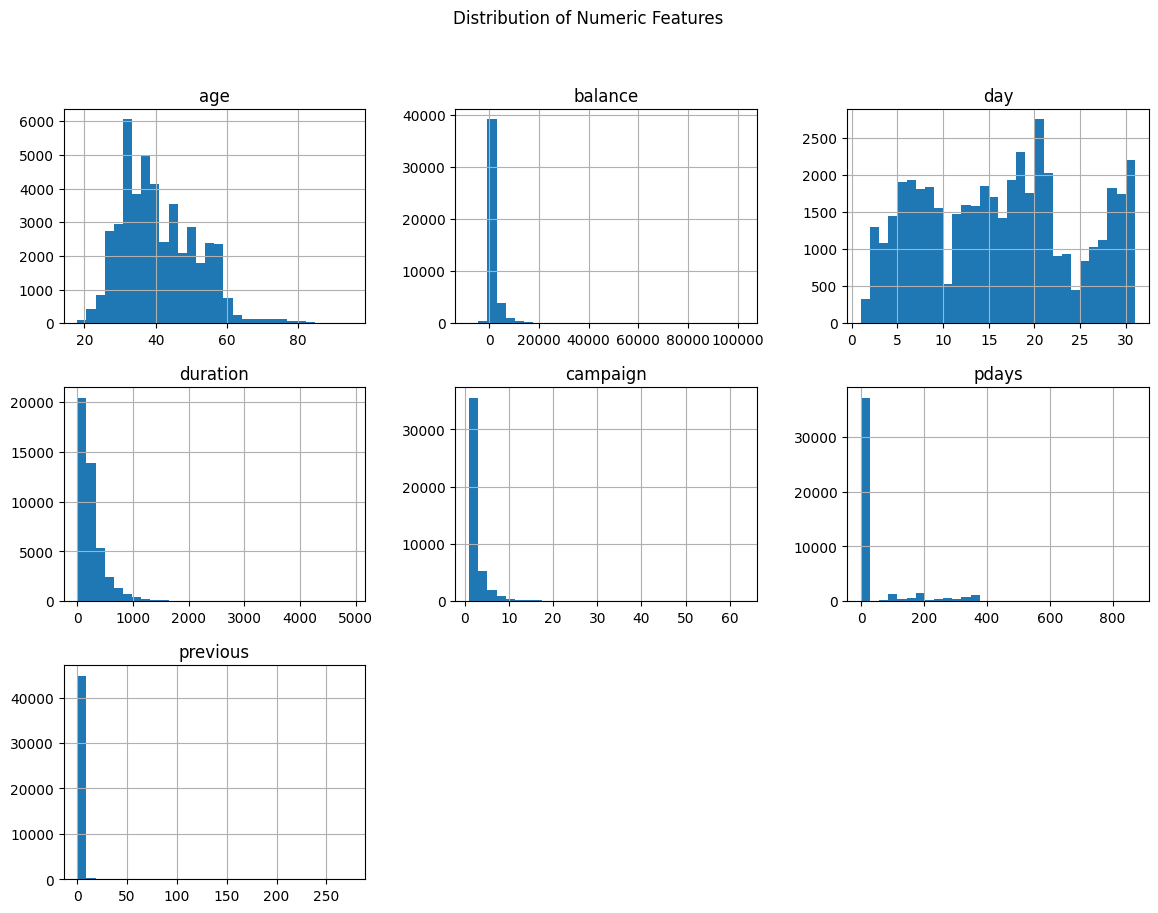

In [ ]:
df.describe()  # Quick stats for numeric features

# Histogram of numeric features
df.hist(figsize=(14, 10), bins=30)
plt.suptitle("Distribution of Numeric Features")
plt.show()

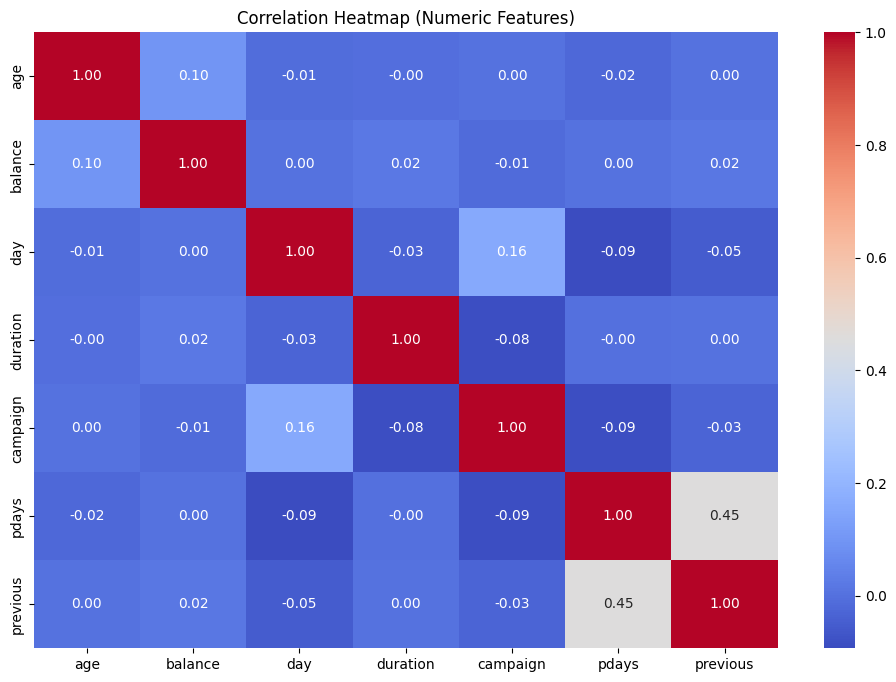

In [ ]:
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

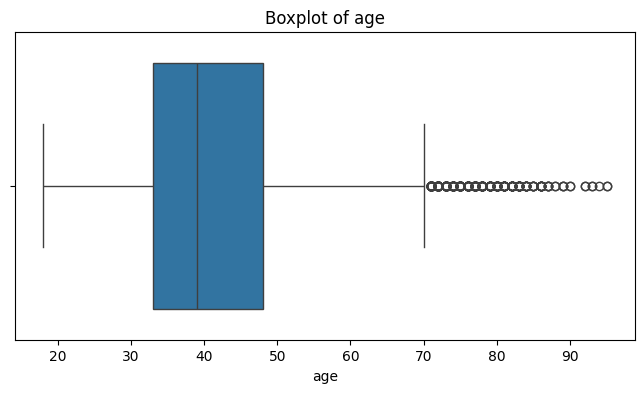

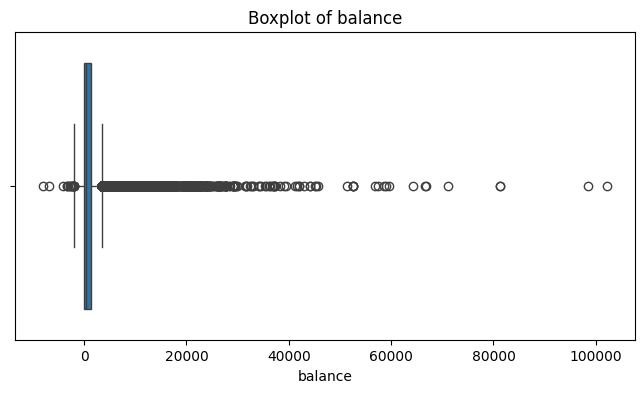

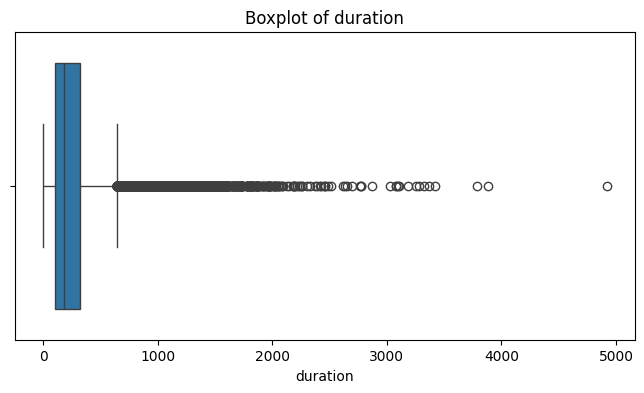

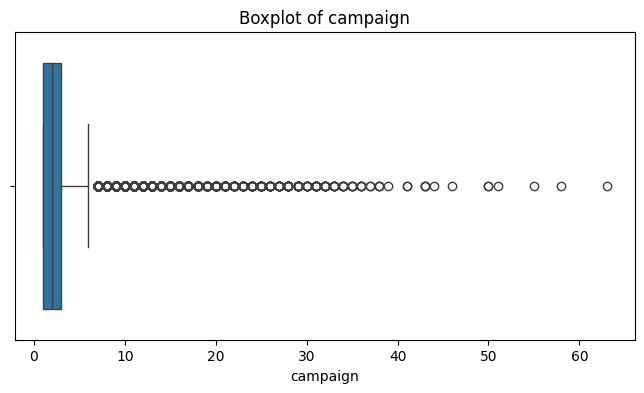

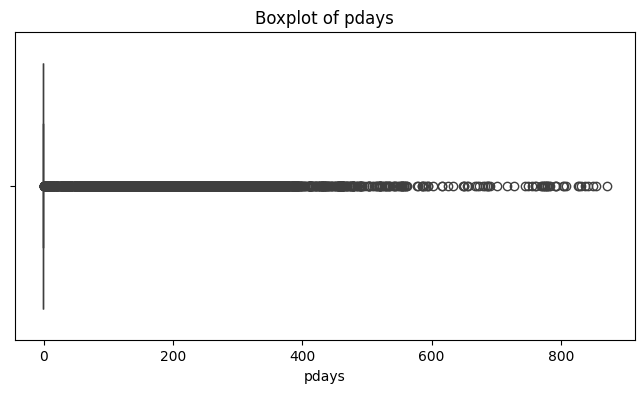

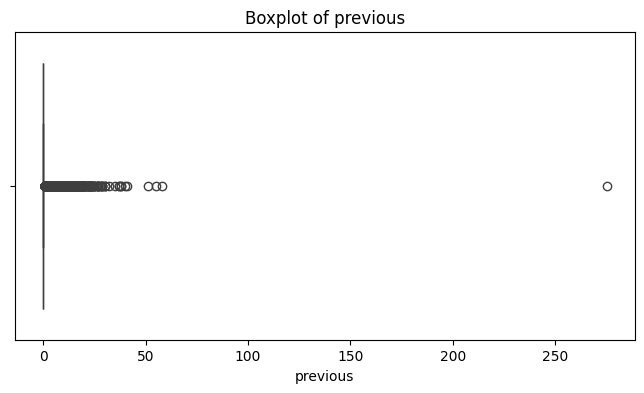

In [ ]:
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [ ]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('There are ', len(numerical_features), 'numerical variables')

# visualising
df[numerical_features].head()

There are  7 numerical variables


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


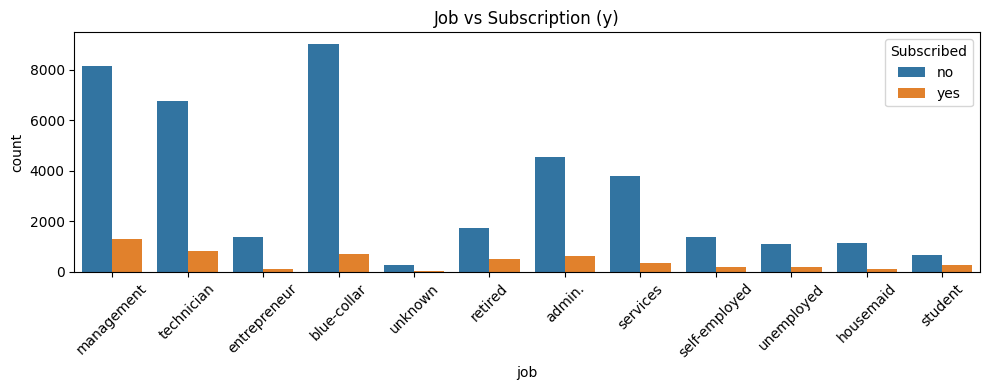

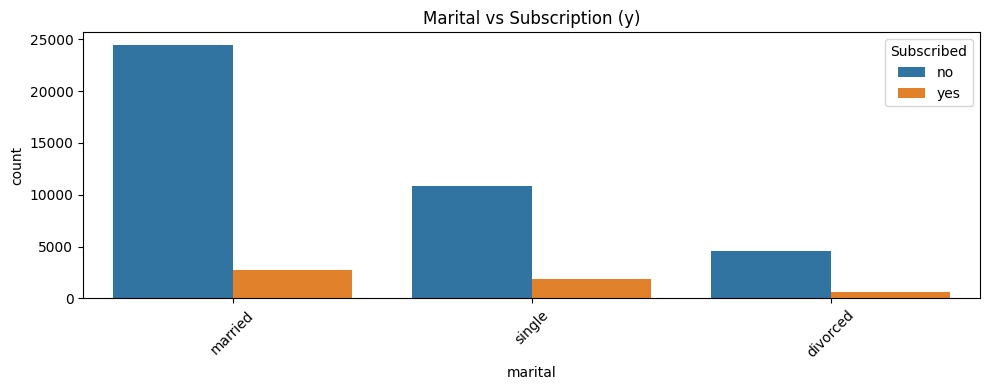

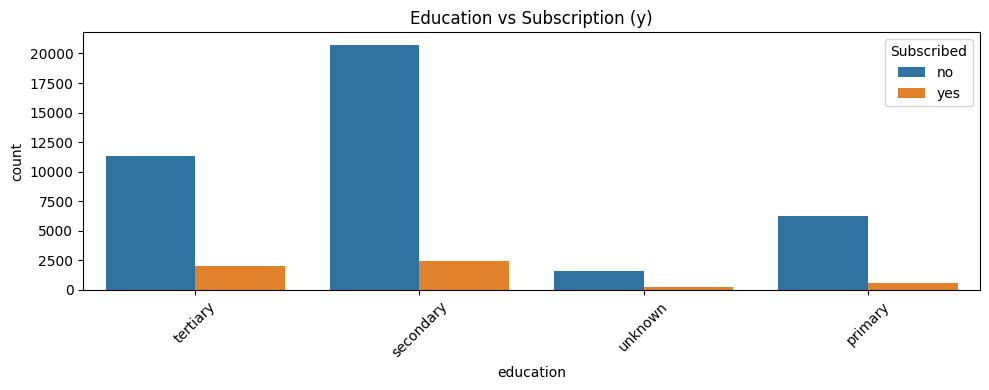

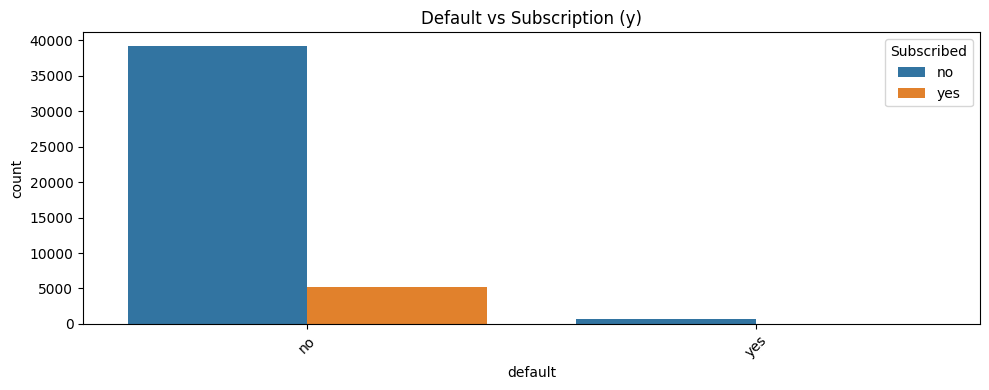

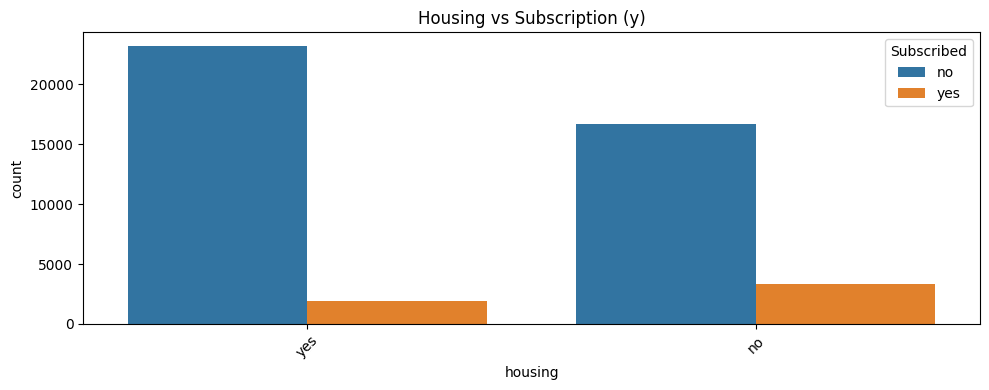

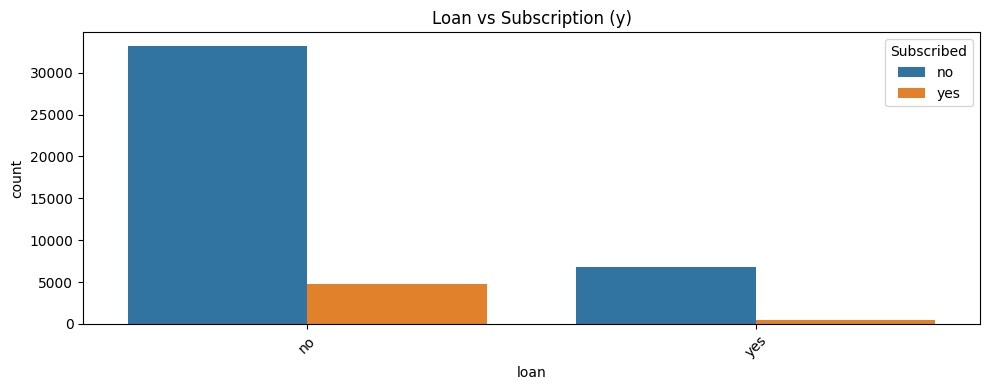

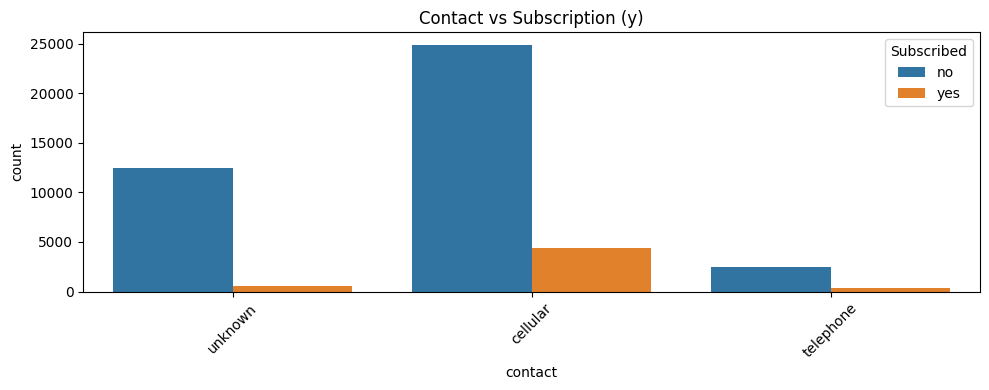

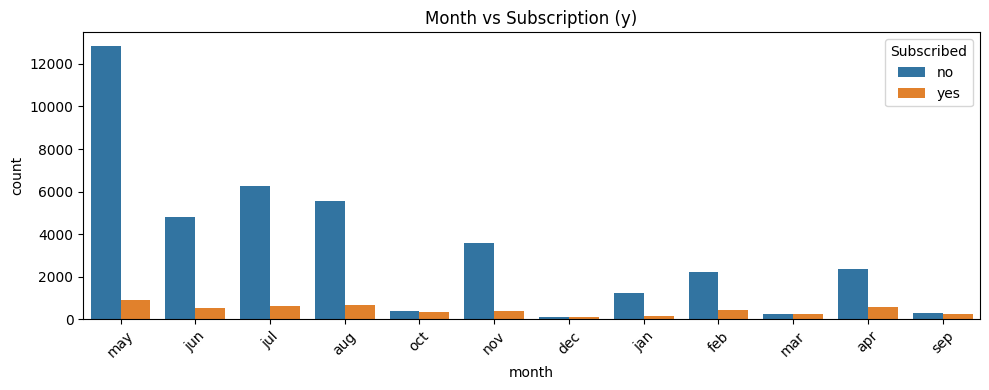

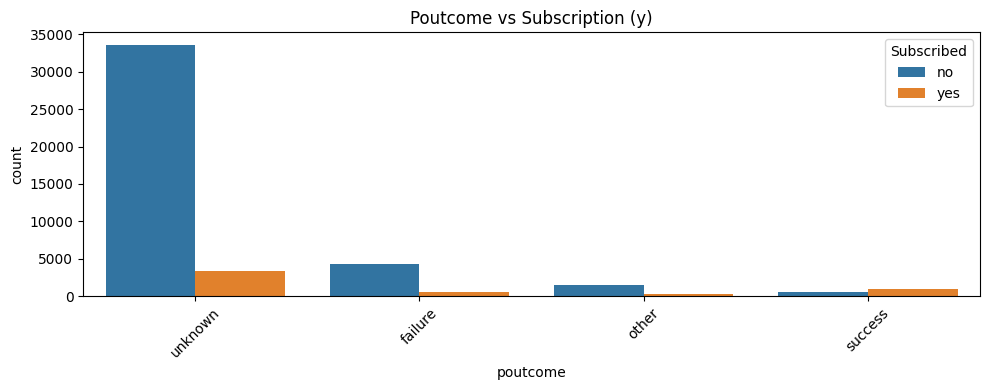

In [ ]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f'{col.capitalize()} vs Subscription (y)')
    plt.xticks(rotation=45)
    plt.legend(title='Subscribed')
    plt.tight_layout()
    plt.show()


##**Feature Engirenning**

In [ ]:
# Create a copy of the original dataframe
df2 = df.copy()

In [ ]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


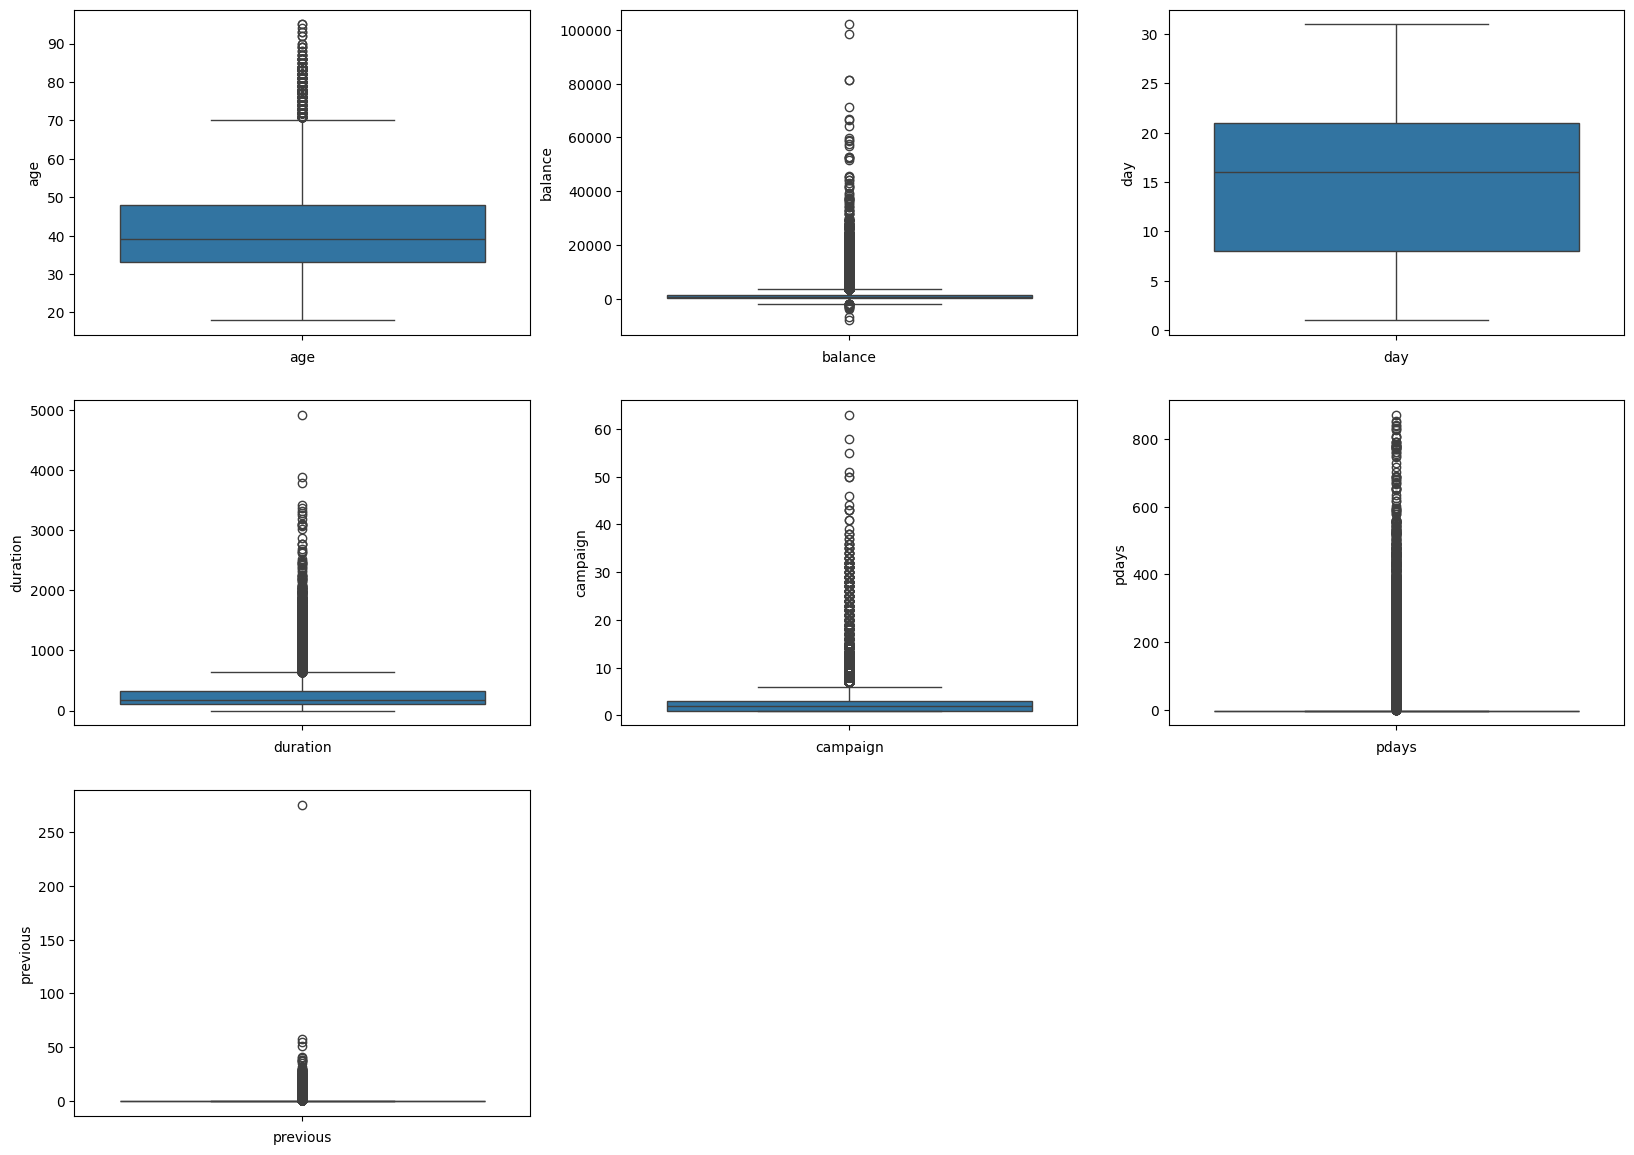

In [ ]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [ ]:
  # Identify columns with 'unknown' values
  unknown_cols = ['job', 'education', 'contact', 'poutcome']

  # Replace 'unknown' with mode (most frequent value) for each column
  for col in unknown_cols:
      mode_val = df2[col].mode()[0]
      df2[col] = df2[col].replace('unknown', mode_val)

  # Verify replacement
  for col in unknown_cols:
      print(f"{col} unique values after replacement:", df2[col].unique())

job unique values after replacement: ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
education unique values after replacement: ['tertiary' 'secondary' 'primary']
contact unique values after replacement: ['cellular' 'telephone']
poutcome unique values after replacement: ['unknown' 'failure' 'other' 'success']


In [ ]:
# Label encode binary categorical variables

binary_cols = ['default', 'housing', 'loan', 'y']
label_encoder = LabelEncoder()
for col in binary_cols:
    df2[col] = label_encoder.fit_transform(df2[col])

# One-hot encode other categorical variables
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
df2 = pd.get_dummies(df2, columns=categorical_cols, drop_first=True)

print("Data shape after encoding:", df2.shape)

Data shape after encoding: (45211, 40)


#Feature creation

In [ ]:
# 1. Create age groups
df2['age_group'] = pd.cut(df2['age'],
                         bins=[0, 30, 40, 50, 60, 100],
                         labels=['<30', '30-40', '40-50', '50-60', '60+'])

# 2. Create balance categories
df2['balance_category'] = pd.cut(df2['balance'],
                                bins=[-float('inf'), 0, 1000, 5000, float('inf')],
                                labels=['negative', 'low', 'medium', 'high'])

# 3. Interaction between housing loan and personal loan
df2['loan_interaction'] = df2['housing'] * df2['loan']

# 4. Campaign success rate (previous success / total contacts)
df2['success_rate'] = df2['previous'] / (df2['campaign'] + 1)  # +1 to avoid division by zero

# 5. Duration per campaign contact
df2['duration_per_contact'] = df2['duration'] / (df2['campaign'] + 1)

# 6. Create a flag for previous success
df2['had_previous_success'] = (df2['previous'] > 0).astype(int)

# One-hot encode the new categorical features we created
new_categorical = ['age_group', 'balance_category']
df2 = pd.get_dummies(df2, columns=new_categorical, drop_first=True)

print("Data shape after feature creation:", df2.shape)

Data shape after feature creation: (45211, 51)


In [ ]:
df2

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,success_rate,duration_per_contact,had_previous_success,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60+,balance_category_low,balance_category_medium,balance_category_high
0,58,0,2143,1,0,5,261,1,-1,0,...,0.000000,130.500000,0,False,False,True,False,False,True,False
1,44,0,29,1,0,5,151,1,-1,0,...,0.000000,75.500000,0,False,True,False,False,True,False,False
2,33,0,2,1,1,5,76,1,-1,0,...,0.000000,38.000000,0,True,False,False,False,True,False,False
3,47,0,1506,1,0,5,92,1,-1,0,...,0.000000,46.000000,0,False,True,False,False,False,True,False
4,33,0,1,0,0,5,198,1,-1,0,...,0.000000,99.000000,0,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0.000000,244.250000,0,False,False,True,False,True,False,False
45207,71,0,1729,0,0,17,456,2,-1,0,...,0.000000,152.000000,0,False,False,False,True,False,True,False
45208,72,0,5715,0,0,17,1127,5,184,3,...,0.500000,187.833333,1,False,False,False,True,False,False,True
45209,57,0,668,0,0,17,508,4,-1,0,...,0.000000,101.600000,0,False,False,True,False,True,False,False


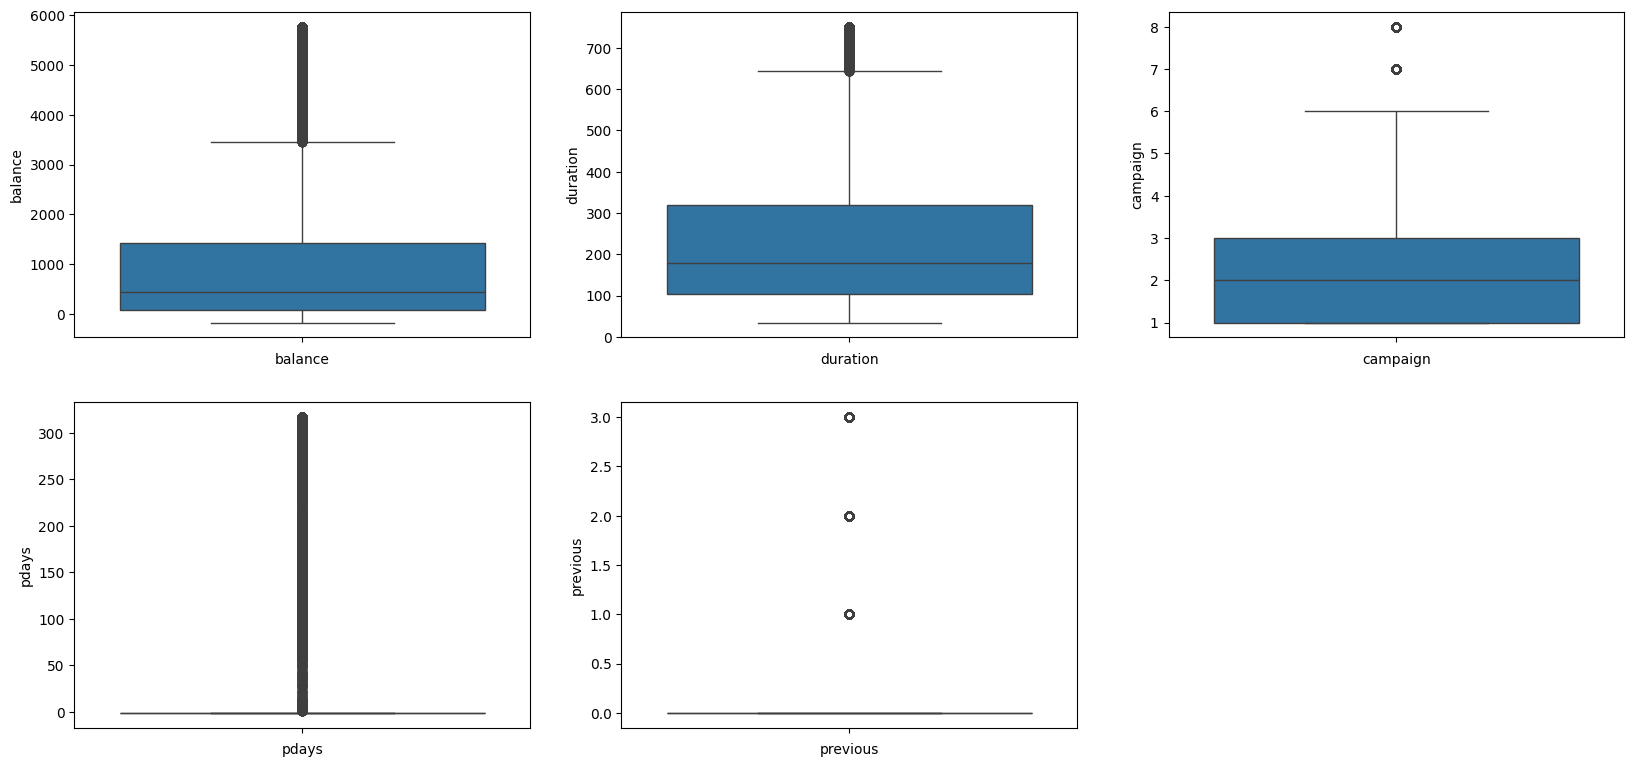

In [ ]:
# Define a function to cap outliers
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return series.clip(lower, upper)

# Apply to numerical features with outliers
outlier_cols = ['balance', 'duration', 'campaign', 'pdays', 'previous']
for col in outlier_cols:
    df2[col] = cap_outliers(df2[col])

# Verify outlier treatment
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in outlier_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df2[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

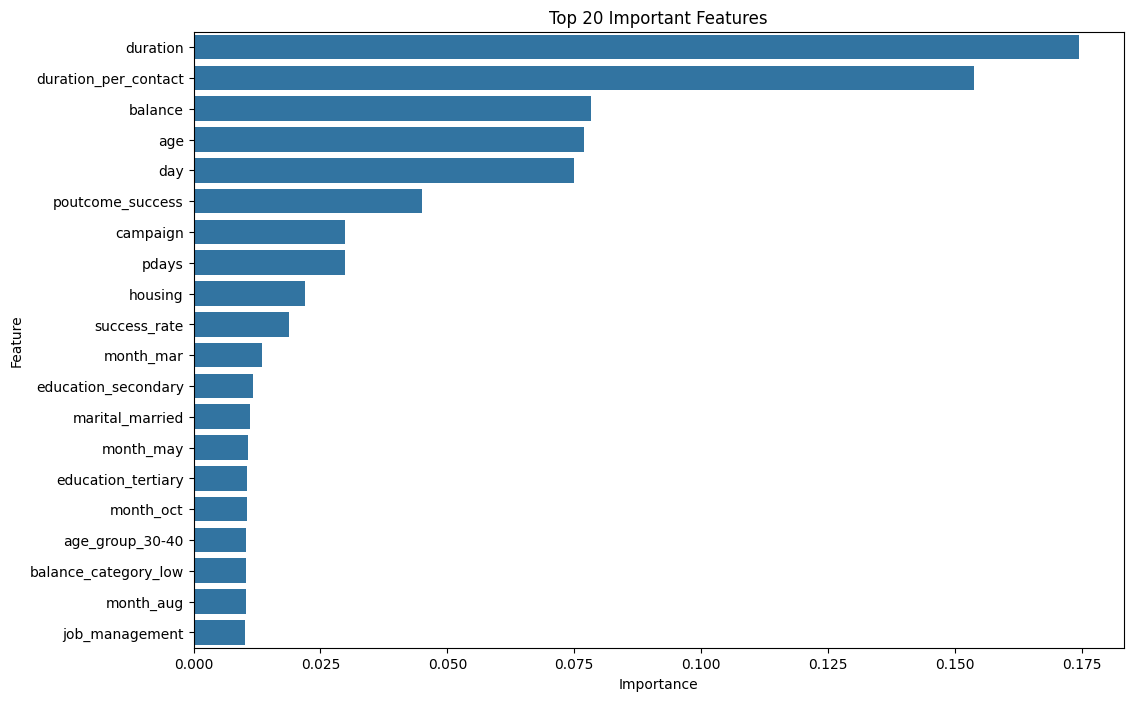

Selected features: ['duration', 'duration_per_contact', 'balance', 'age', 'day', 'poutcome_success', 'campaign', 'pdays', 'housing', 'success_rate', 'month_mar', 'education_secondary', 'marital_married', 'month_may', 'education_tertiary', 'month_oct', 'age_group_30-40', 'balance_category_low', 'month_aug', 'job_management', 'previous']
Final data shape: (45211, 22)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target
X = df2.drop('y', axis=1)
y = df2['y']

# Train a Random Forest to get feature importance (as a proxy)
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Important Features')
plt.show()

# Select top features (adjust threshold as needed)
selected_features = feature_importance[feature_importance['Importance'] > 0.01]['Feature'].tolist()
print("Selected features:", selected_features)

# Filter dataframe to keep only important features
df2 = df2[selected_features + ['y']]
print("Final data shape:", df2.shape)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   duration              45211 non-null  int64  
 1   duration_per_contact  45211 non-null  float64
 2   balance               45211 non-null  int64  
 3   age                   45211 non-null  int64  
 4   day                   45211 non-null  int64  
 5   poutcome_success      45211 non-null  bool   
 6   campaign              45211 non-null  int64  
 7   pdays                 45211 non-null  int64  
 8   housing               45211 non-null  int64  
 9   success_rate          45211 non-null  float64
 10  month_mar             45211 non-null  bool   
 11  education_secondary   45211 non-null  bool   
 12  marital_married       45211 non-null  bool   
 13  month_may             45211 non-null  bool   
 14  education_tertiary    45211 non-null  bool   
 15  month_oct          

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter
# Split into features and target
X = df2.drop('y', axis=1)
y = df2['y']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance (since we saw it's imbalanced)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_res))

Class distribution before SMOTE: Counter({0: 31937, 1: 4231})
Class distribution after SMOTE: Counter({0: 31937, 1: 31937})


In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Ensure we're using the same train/test split
X = df2.drop('y', axis=1)
y = df2['y']

# Scale features - critical for neural networks
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (using same random_state=42 for consistency)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Final shapes:")
print("Training data:", X_train_res.shape)
print("Test data:", X_test.shape)

Final shapes:
Training data: (63874, 21)
Test data: (9043, 21)


In [ ]:
def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.AUC(name='auc')
        ]
    )
    return model

# Initialize model
model = build_model(X_train_res.shape[1])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_res, y_train_res,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7912 - auc: 0.8639 - loss: 0.4401 - precision: 0.7259 - recall: 0.7122 - val_accuracy: 0.8352 - val_auc: 0.0000e+00 - val_loss: 0.4832 - val_precision: 1.0000 - val_recall: 0.8352
Epoch 2/100
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8287 - auc: 0.9042 - loss: 0.3767 - precision: 0.7541 - recall: 0.8091 - val_accuracy: 0.8290 - val_auc: 0.0000e+00 - val_loss: 0.4788 - val_precision: 1.0000 - val_recall: 0.8290
Epoch 3/100
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8367 - auc: 0.9107 - loss: 0.3641 - precision: 0.7612 - recall: 0.8194 - val_accuracy: 0.8475 - val_auc: 0.0000e+00 - val_loss: 0.4489 - val_precision: 1.0000 - val_recall: 0.8475
Epoch 4/100
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8416 - auc: 0.9152 - loss: 0.3534 - precision: 0.7639 - recall: 0.8300 - val_accuracy: 0.8291 - val_auc: 0.0000e+00 - val_loss: 0.4923 - val_precision: 1.0000 - val_recall: 0.8291
Epo

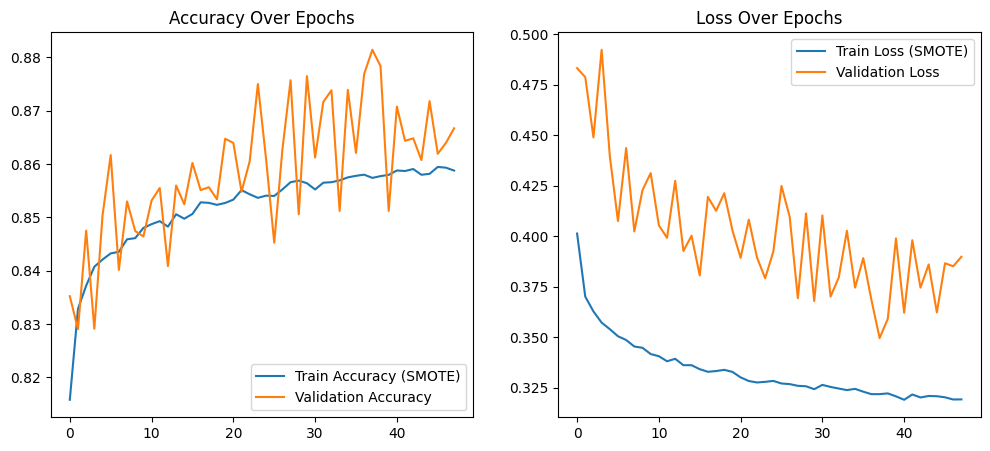


Training Set Evaluation (SMOTE-resampled):
Accuracy: 0.8721
Precision: 0.8669
Recall: 0.8791
AUC: 0.9418
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


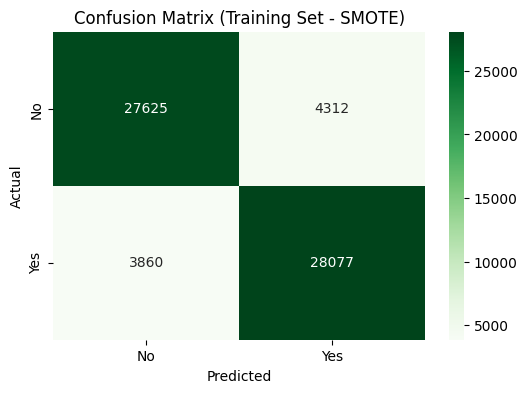


Classification Report (Training Set - SMOTE):
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     31937
           1       0.87      0.88      0.87     31937

    accuracy                           0.87     63874
   macro avg       0.87      0.87      0.87     63874
weighted avg       0.87      0.87      0.87     63874


Test Set Evaluation:
Accuracy: 0.8483
Precision: 0.4202
Recall: 0.7817
AUC: 0.8997
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


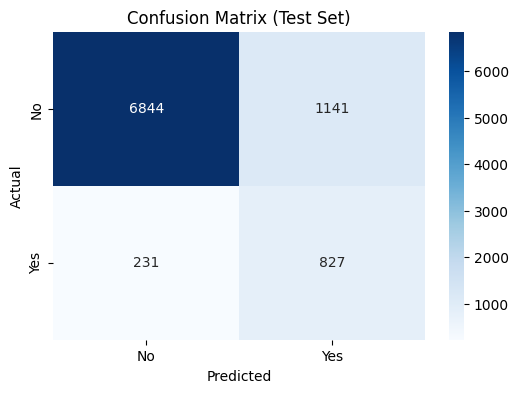


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      7985
           1       0.42      0.78      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.69      0.82      0.73      9043
weighted avg       0.90      0.85      0.87      9043



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Plot training history (accuracy & loss)
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy (SMOTE)')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss (SMOTE)')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    plt.show()

plot_history(history)

# ========================
# 1. Evaluate Training Set (SMOTE-resampled)
# ========================
train_results = model.evaluate(X_train_res, y_train_res, verbose=0)
print("\nTraining Set Evaluation (SMOTE-resampled):")
print(f"Accuracy: {train_results[1]:.4f}")
print(f"Precision: {train_results[2]:.4f}")
print(f"Recall: {train_results[3]:.4f}")
print(f"AUC: {train_results[4]:.4f}")

# Predictions on training set (SMOTE)
y_train_pred = (model.predict(X_train_res) > 0.5).astype(int)

# Confusion matrix (Training - SMOTE)
cm_train = confusion_matrix(y_train_res, y_train_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (Training Set - SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report (Training - SMOTE)
print("\nClassification Report (Training Set - SMOTE):")
print(classification_report(y_train_res, y_train_pred))

# ========================
# 2. Evaluate Test Set (Original distribution)
# ========================
test_results = model.evaluate(X_test, y_test, verbose=0)
print("\nTest Set Evaluation:")
print(f"Accuracy: {test_results[1]:.4f}")
print(f"Precision: {test_results[2]:.4f}")
print(f"Recall: {test_results[3]:.4f}")
print(f"AUC: {test_results[4]:.4f}")

# Predictions on test set
y_test_pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion matrix (Test)
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report (Test)
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

In [ ]:
!pip install keras-tuner
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers

# Define the model building function with tunable batch_size
def build_model(hp):
    model = keras.Sequential()

    # Tunable number of layers (1-3)
    for i in range(hp.Int('num_layers', 1, 3)):
        # Tunable number of units per layer
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'))
        # Tunable dropout rate
        model.add(layers.Dropout(
            hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Tunable learning rate
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Tunable batch size
    batch_size = hp.Int('batch_size', min_value=32, max_value=128, step=32)


    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc')]
    )
    return model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective("val_auc", direction="max"),
    max_trials=20,
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='bank_marketing'
)


early_stopping = EarlyStopping(
    monitor='val_auc',
    patience=5,
    mode='max',
    restore_best_weights=True
)
tuner.search(
    X_train_res, y_train_res,
    validation_split=0.2,
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(
    X_train_res, y_train_res,
    validation_split=0.2,
    epochs=100,
    batch_size=best_hps.get('batch_size'),
    callbacks=[early_stopping],
    verbose=1
)

Trial 20 Complete [00h 00m 36s]
val_auc: 0.0

Best val_auc So Far: 0.0
Total elapsed time: 00h 16m 16s
Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8174 - auc: 0.8884 - loss: 0.3990 - val_accuracy: 0.8413 - val_auc: 0.0000e+00 - val_loss: 0.4272
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8444 - auc: 0.9190 - loss: 0.3453 - val_accuracy: 0.8179 - val_auc: 0.0000e+00 - val_loss: 0.4768
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8468 - auc: 0.9216 - loss: 0.3398 - val_accuracy: 0.8374 - val_auc: 0.0000e+00 - val_loss: 0.4549
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8521 - auc: 0.9254 - loss: 0.3320 - val_accuracy: 0.8442 - val_auc: 0.0000e+00 - val_loss: 0.4358
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8545 - auc: 0.9281 - loss: 0.3251 - val_accuracy: 0.8712 - val_auc: 0.0000e+00 - val_loss: 0.3888
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8557 

In [ ]:
# Evaluate on test set
test_results = best_model.evaluate(X_test, y_test, verbose=0)
print("\nOptimized Model Test Set Evaluation:")
print(f"Accuracy: {test_results[1]:.4f}")
print(f"AUC: {test_results[2]:.4f}")

# Predictions and classification report
y_pred = (best_model.predict(X_test) > 0.5).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred))


Optimized Model Test Set Evaluation:
Accuracy: 0.8392
AUC: 0.9000
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      7985
           1       0.40      0.79      0.53      1058

    accuracy                           0.84      9043
   macro avg       0.69      0.82      0.72      9043
weighted avg       0.90      0.84      0.86      9043



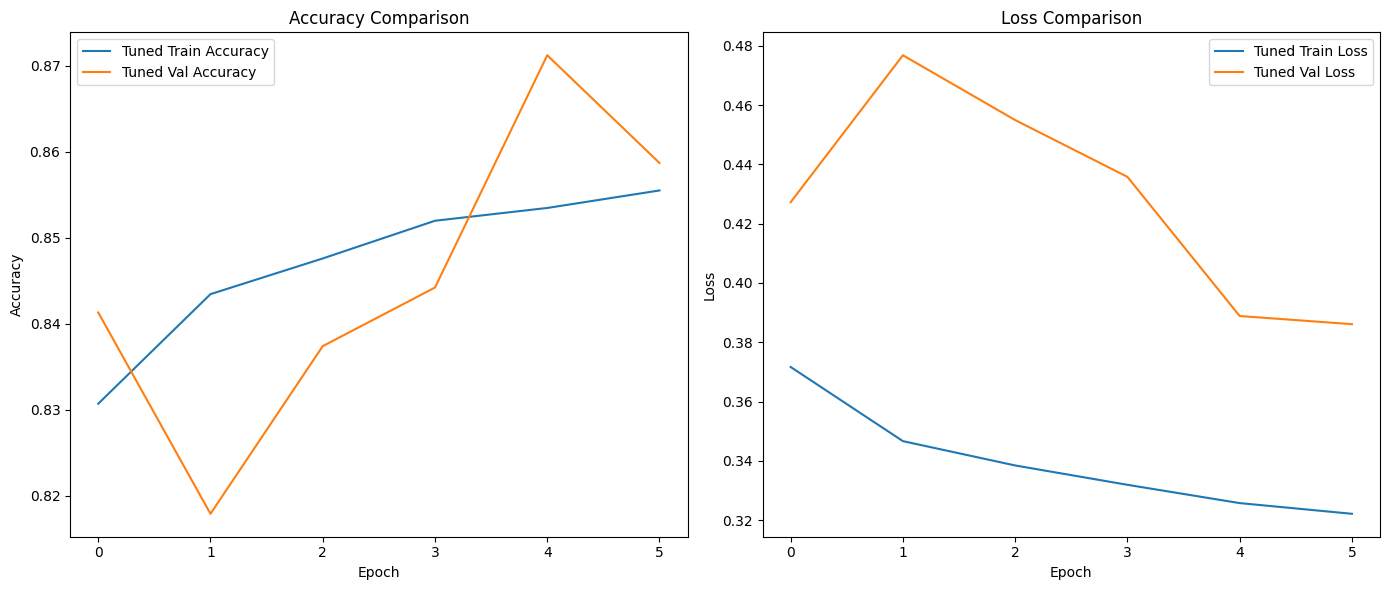

In [ ]:
# Plot training history comparison
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Tuned Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Tuned Val Accuracy')
# plt.plot(original_history.history['accuracy'], '--', label='Original Train Accuracy')
# plt.plot(original_history.history['val_accuracy'], '--', label='Original Val Accuracy')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Tuned Train Loss')
plt.plot(history.history['val_loss'], label='Tuned Val Loss')
# plt.plot(original_history.history['loss'], '--', label='Original Train Loss')
# plt.plot(original_history.history['val_loss'], '--', label='Original Val Loss')
plt.title('Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

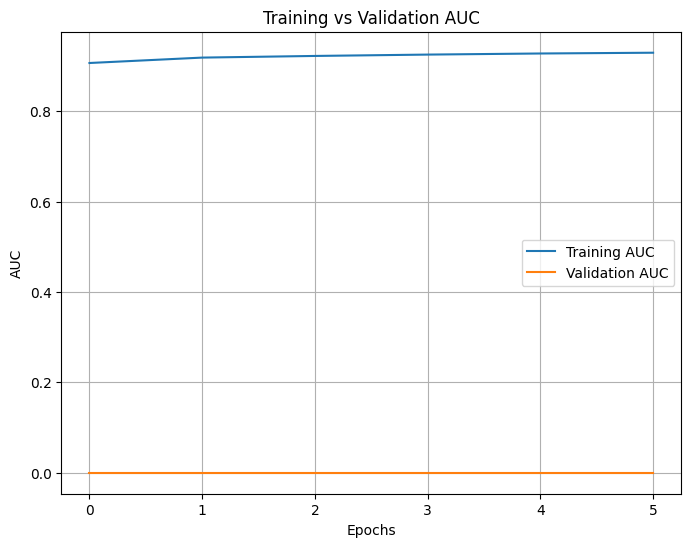

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Training vs Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.show()


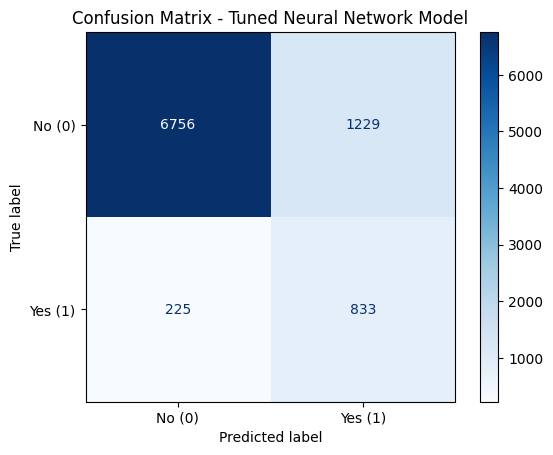

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No (0)', 'Yes (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Tuned Neural Network Model")
plt.grid(False)
plt.show()
